# Importation des Bibliothéques💯


In [65]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras import utils

from tensorflow.keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

# **Train/Validation/Test Split**

In [66]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [67]:
# Construct a validation set from the last 10000 images and labels from 
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:]

# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]

In [68]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

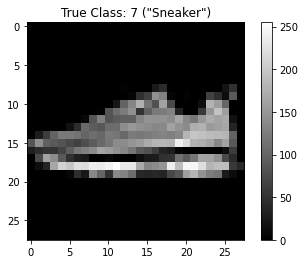

In [69]:
plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

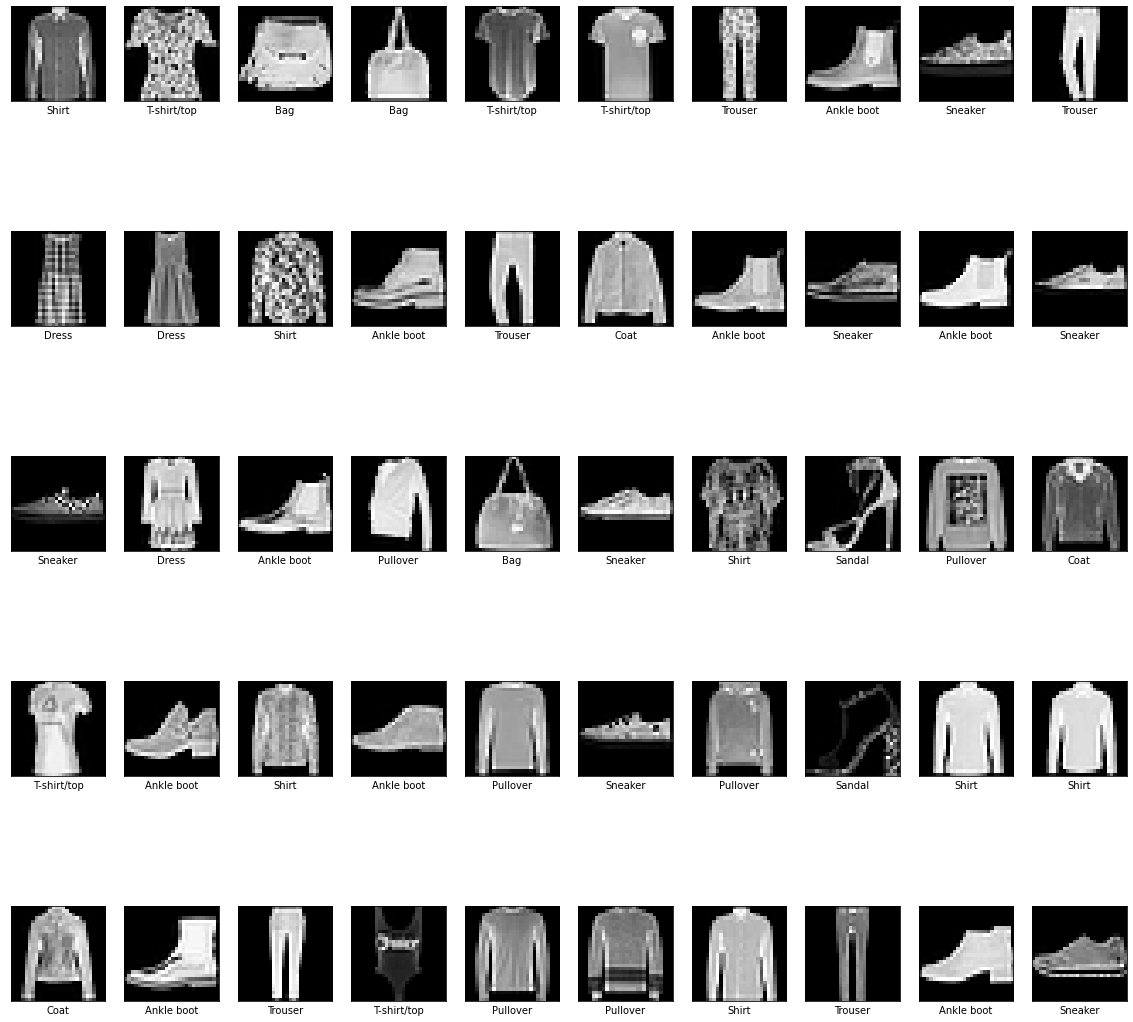

In [70]:
# Another view, showing 50 randomly selected images at a time
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])

# **Preprocess**

In [71]:
# Flatten

train_images_flatten = train_images.reshape(train_images.shape[0], 784)
validation_images_flatten = validation_images.reshape(validation_images.shape[0], 784)
test_images_flatten = test_images.reshape(test_images.shape[0], 784)

In [72]:
# Normalize

train_images_model = train_images_flatten/255.
validation_images_model = validation_images_flatten /225
test_images_model = test_images_flatten/225

In [73]:
# convert class vectors to binary class matrices
train_labels_categ =tf.keras.utils.to_categorical(train_labels, 10)
validation_labels_categ = tf.keras.utils.to_categorical(validation_labels, 10)
test_labels_categ = tf.keras.utils.to_categorical(test_labels, 10)

# ***Train***

In [76]:
batch_size = 128
num_classes = 10
epochs = 40
 
model= Sequential()
model.add(Dense(254, input_dim = 784, activation='relu'))   
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation="softmax"))
   
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_images_model, train_labels_categ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images_model, validation_labels_categ))





Epoch 1/40
391/391 [==============================] - 3s 7ms/step - loss: 0.5845 - accuracy: 0.7903 - val_loss: 0.4021 - val_accuracy: 0.8511
Epoch 2/40
391/391 [==============================] - 3s 7ms/step - loss: 0.4001 - accuracy: 0.8519 - val_loss: 0.3749 - val_accuracy: 0.8674
Epoch 3/40
391/391 [==============================] - 2s 6ms/step - loss: 0.3558 - accuracy: 0.8682 - val_loss: 0.4333 - val_accuracy: 0.8489
Epoch 4/40
391/391 [==============================] - 2s 6ms/step - loss: 0.3306 - accuracy: 0.8776 - val_loss: 0.3329 - val_accuracy: 0.8801
Epoch 5/40
391/391 [==============================] - 2s 6ms/step - loss: 0.3125 - accuracy: 0.8834 - val_loss: 0.3408 - val_accuracy: 0.8767
Epoch 6/40
391/391 [==============================] - 2s 6ms/step - loss: 0.2977 - accuracy: 0.8909 - val_loss: 0.3372 - val_accuracy: 0.8822
Epoch 7/40
391/391 [==============================] - 2s 6ms/step - loss: 0.2829 - accuracy: 0.8940 - val_loss: 0.3605 - val_accuracy: 0.8743
Epoch 

# ***Test***

In [77]:
score = model.evaluate(test_images_model, test_labels_categ, verbose=0)
print('Test accuracy:', score[1])
# You should be able to get,at least, 88% accuracy

Test accuracy: 0.8907999992370605


In [78]:
test_logits = model.predict(test_images_flatten)

In [79]:
test_logits

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [80]:
test_predictions = np.argmax(test_logits, axis=1)


In [81]:
test_predictions

array([9, 2, 1, ..., 8, 1, 5])

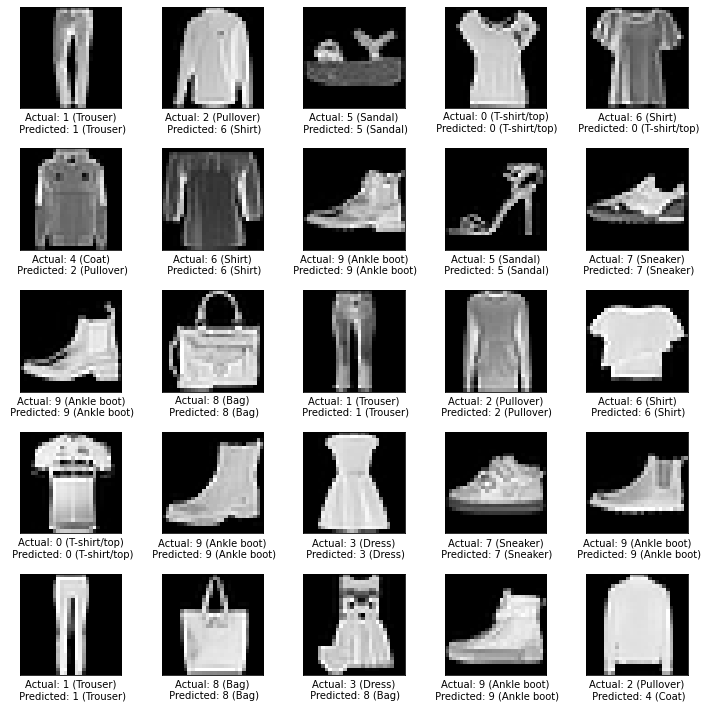

In [83]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 10000)
    plt.imshow(test_images[img_index], cmap=plt.cm.gray)
    
    actual_label = int(test_labels[img_index])
    predicted_label = int(test_predictions[img_index])
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))
    
plt.tight_layout()
plt.show()